
Información general del dataset antes de eliminar columnas:
<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1304 non-null   int64         
 1   date                  1304 non-null   datetime64[ns]
 2   year                  1304 non-null   int64         
 3   source_database       1304 non-null   object        
 4   attack_description    1304 non-null   object        
 5   country               1304 non-null   object        
 6   industry_type         1304 non-null   object        
 7   subcategory           1304 non-null   object        
 8   attack_details        1304 non-null   object        
 9   ti_safe_score         638 non-null    float64       
 10  impact                724 non-null    object        
 11  link_at_the_internet  1090 non-null   object        
dtypes: datetime64[ns](1)

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_4092\2633108941.py:25: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


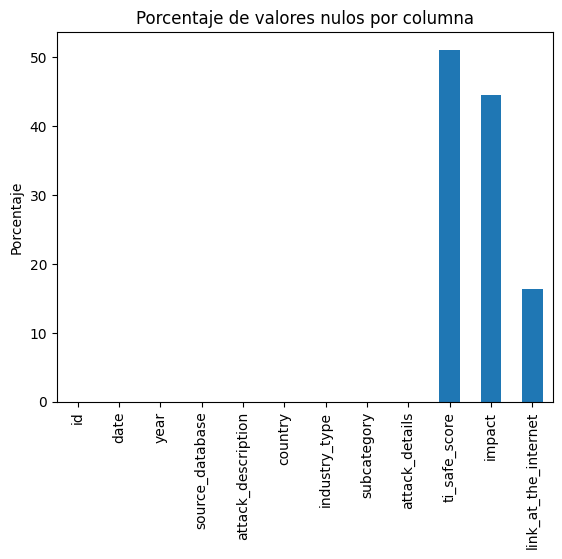


Información del dataset después de eliminar columnas con muchos nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1304 non-null   int64         
 1   date                  1304 non-null   datetime64[ns]
 2   year                  1304 non-null   int64         
 3   source_database       1304 non-null   object        
 4   attack_description    1304 non-null   object        
 5   country               1304 non-null   object        
 6   industry_type         1304 non-null   object        
 7   subcategory           1304 non-null   object        
 8   attack_details        1304 non-null   object        
 9   ti_safe_score         638 non-null    float64       
 10  impact                724 non-null    object        
 11  link_at_the_internet  1090 non-null   object        
dtypes: dateti

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = './data/TISAFE.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {file_path}")
    exit()

# Limpieza de datos
df.drop_duplicates(inplace=True)  # Eliminar duplicados

# Eliminar filas con nulos en columnas críticas
df.dropna(subset=['attack_description', 'country', 'industry_type', 'attack_details'], inplace=True)

# Normalizar columna industry_type
df['industry_type'] = df['industry_type'].str.strip().str.lower().replace({
    'gpver,emt': 'government',
    # ... otras correcciones
})

# Convertir columna date a formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Eliminar columnas específicas
df.drop(['origin', 'attack_vector'], axis=1, inplace=True)

# Información general del dataset antes de eliminar columnas con muchos nulos
print("\nInformación general del dataset antes de eliminar columnas:")
df.info()
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos por columna:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Definir el umbral de eliminación de columnas (en porcentaje)
umbral_eliminacion = 70

# Calcular el porcentaje de valores nulos por columna y visualizar
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
porcentaje_nulos.plot(kind='bar', title='Porcentaje de valores nulos por columna')
plt.ylabel('Porcentaje')
plt.show()

# Obtener las columnas a eliminar
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral_eliminacion].index

# Eliminar las columnas con más del umbral de valores nulos
df.drop(columnas_a_eliminar, axis=1, inplace=True)

# Información final del dataset después de eliminar columnas
print("\nInformación del dataset después de eliminar columnas con muchos nulos:")
df.info()
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos por columna:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

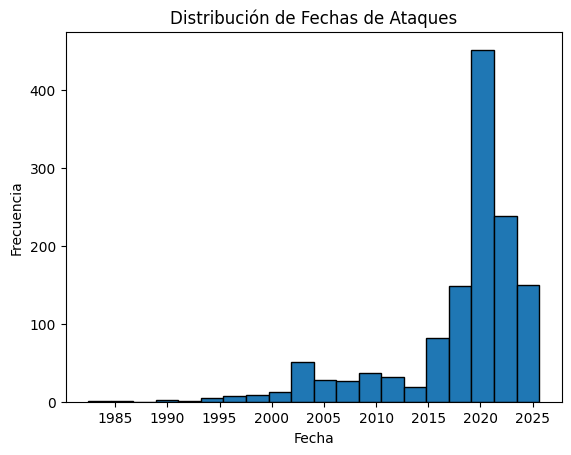


Frecuencia de ataques por país (Top 10):
country
United States     672
Brazil             89
Canada             46
England            45
Global             39
Australia          29
Germany            25
France             21
Europe             19
United Kingdom     19
Name: count, dtype: int64


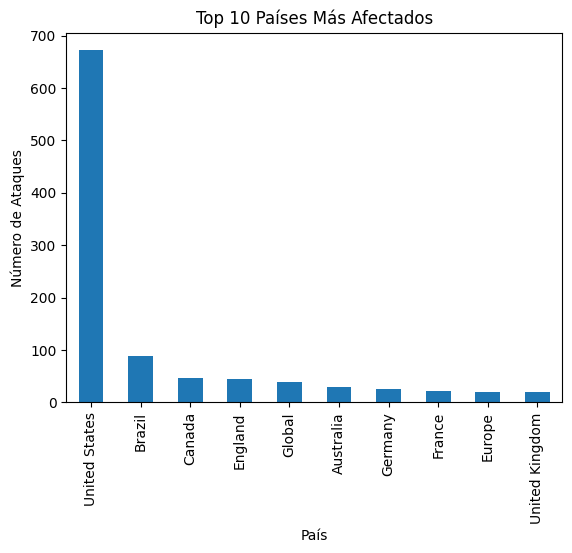


Frecuencia de ataques por industria (Top 10):
industry_type
government facilities sector                   280
transport sector and systems                   114
energy sector                                  101
communication and telecommunications sector     85
manufacturing and automation sector             79
information technology sector                   75
government facilities                           73
water and wastewater sector and systems         56
hospital and health sector                      52
banking and finance sector                      48
Name: count, dtype: int64


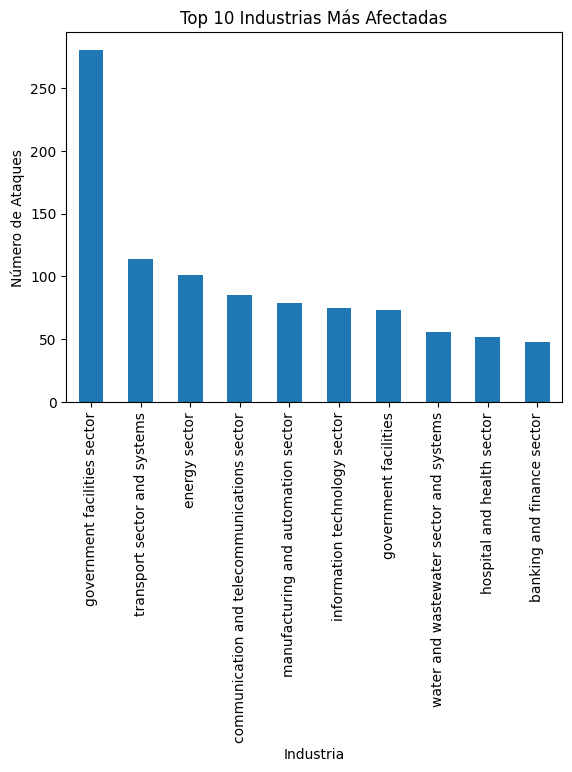

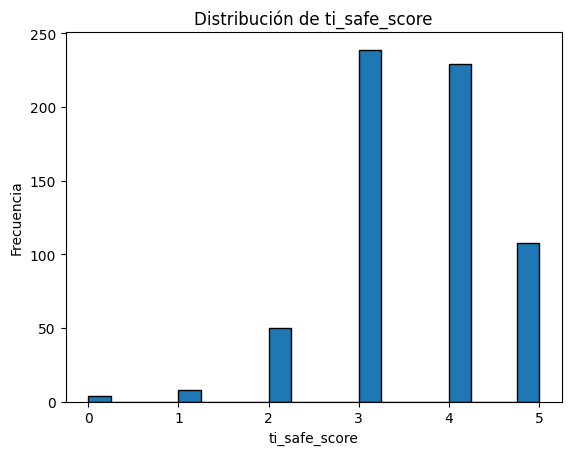


Matriz de correlaciones entre variables numéricas:
                     id      year  ti_safe_score
id             1.000000  0.785322      -0.100417
year           0.785322  1.000000      -0.082743
ti_safe_score -0.100417 -0.082743       1.000000


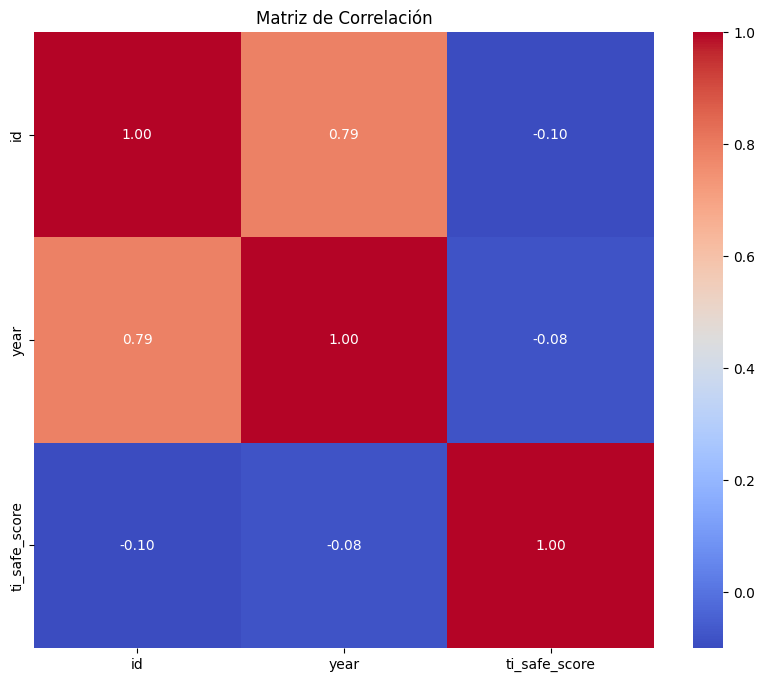

In [18]:
# Distribución de las fechas de los ataques
plt.hist(df['date'], bins=20, edgecolor='k')
plt.title('Distribución de Fechas de Ataques')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de ataques por país
country_counts = df['country'].value_counts()
print("\nFrecuencia de ataques por país (Top 10):")
print(country_counts.head(10))

# Gráfico de los países más afectados
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Países Más Afectados')
plt.xlabel('País')
plt.ylabel('Número de Ataques')
plt.show()

# Frecuencia de ataques por industria
industry_counts = df['industry_type'].value_counts()
print("\nFrecuencia de ataques por industria (Top 10):")
print(industry_counts.head(10))

# Gráfico de las industrias más afectadas
industry_counts.head(10).plot(kind='bar')
plt.title('Top 10 Industrias Más Afectadas')
plt.xlabel('Industria')
plt.ylabel('Número de Ataques')
plt.show()

# Relación entre subcategory_encoded y ti_safe_score (si ambas columnas están presentes)
if 'subcategory_encoded' in df.columns and 'ti_safe_score' in df.columns:
    plt.scatter(df['subcategory_encoded'], df['ti_safe_score'])
    plt.title('Relación entre subcategory_encoded y ti_safe_score')
    plt.xlabel('subcategory_encoded')
    plt.ylabel('ti_safe_score')
    plt.show()

# Distribución de ti_safe_score (si está presente)
if 'ti_safe_score' in df.columns:
    plt.hist(df['ti_safe_score'].dropna(), bins=20, edgecolor='k')
    plt.title('Distribución de ti_safe_score')
    plt.xlabel('ti_safe_score')
    plt.ylabel('Frecuencia')
    plt.show()

# Correlación entre variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
if not numeric_cols.empty:
    correlation_matrix = numeric_cols.corr()
    print("\nMatriz de correlaciones entre variables numéricas:")
    print(correlation_matrix)

    # Mapa de calor para visualización de la correlación (requiere seaborn)
    import seaborn as sns
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación')
    plt.show()



Estadísticas descriptivas para variables numéricas:
                id                           date         year  ti_safe_score
count  1304.000000                           1304  1304.000000     638.000000
mean    655.919479  2017-12-07 05:58:53.742331392  2017.536043       3.575235
min       1.000000            1982-06-01 00:00:00  1982.000000       0.000000
25%     328.750000            2017-01-31 18:00:00  2017.000000       3.000000
50%     654.500000            2020-01-22 12:00:00  2020.000000       4.000000
75%     981.250000            2021-11-23 00:00:00  2021.000000       4.000000
max    1338.000000            2025-08-15 00:00:00  2024.000000       5.000000
std     379.586674                            NaN     6.287210       0.944195

Frecuencia de valores para variables categóricas:

Frecuencia de country:
country
United States    672
Brazil            89
Canada            46
England           45
Global            39
                ... 
Saudi Arabia       1
Qatar          

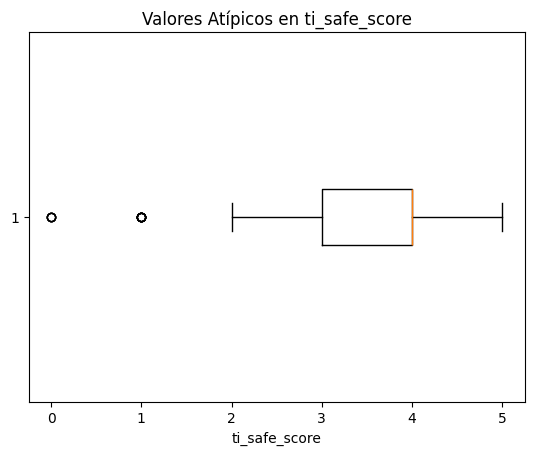

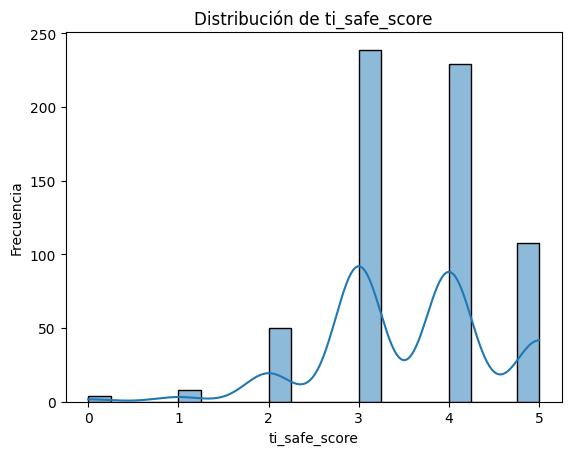


Tabla cruzada entre country e industry_type (Top 10 países e industrias):
industry_type              activism  aerospace  agricultural sector  \
country                                                               
\r\nUkraine                       0          0                    0   
Andorra                           0          0                    0   
Arab Emirates                     0          0                    0   
Argentina                         0          0                    0   
Asia                              0          0                    0   
Asia and United States            0          0                    0   
Australia                         0          0                    1   
Australia                         0          0                    0   
Australia and New Zealand         0          0                    0   
Austria                           0          0                    0   

industry_type              agriculture, food and beverage  apps  automot

) missing from font(s) DejaVu Sans.ming\Python\Python312\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.ming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


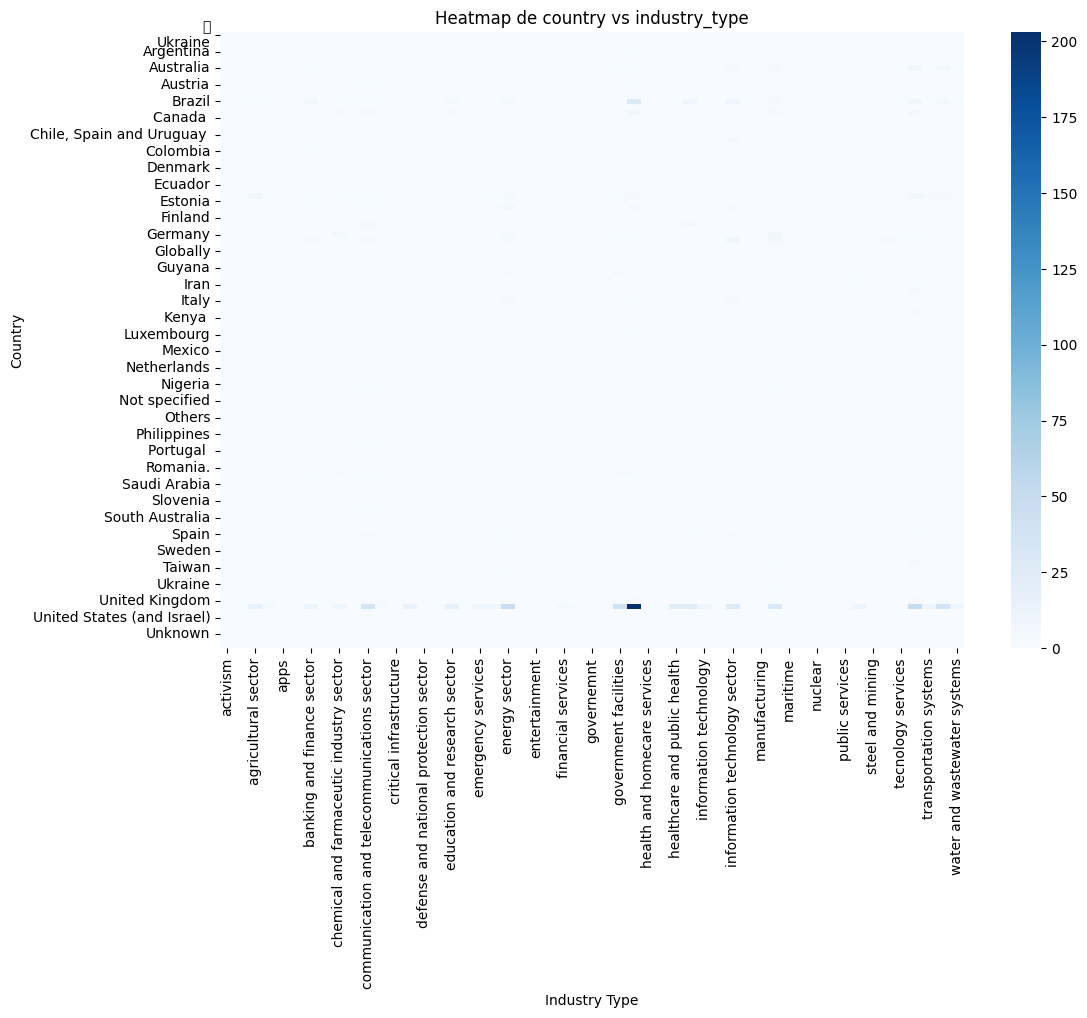


Número de ataques por año:
year
1982      1
1985      1
1989      1
1991      1
1992      1
1994      3
1995      2
1996      2
1997      5
1998      1
1999      8
2000      4
2001      9
2002     13
2003     33
2004     13
2005     13
2006      7
2007     10
2008     17
2009     21
2010     17
2011     18
2012     15
2013      4
2014     15
2015     11
2016     69
2017     78
2018     62
2019    177
2020    257
2021    121
2022    117
2023     86
2024     91
Name: count, dtype: int64


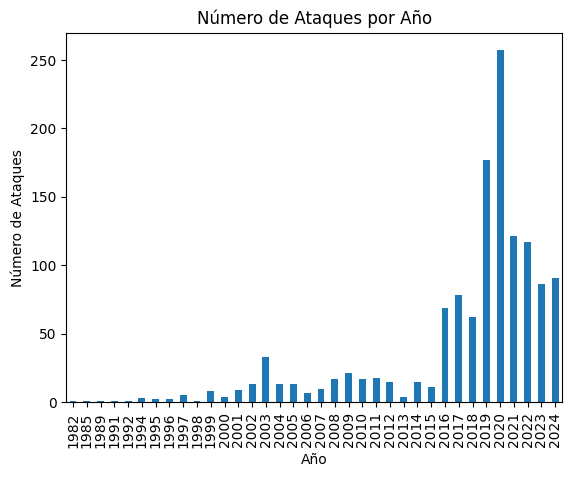

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df.describe())

# Estadísticas descriptivas para variables categóricas
print("\nFrecuencia de valores para variables categóricas:")
categorical_columns = ['country', 'industry_type', 'impact']
for col in categorical_columns:
    print(f"\nFrecuencia de {col}:")
    print(df[col].value_counts())

# Detección de valores atípicos en ti_safe_score
if 'ti_safe_score' in df.columns:
    plt.boxplot(df['ti_safe_score'].dropna(), vert=False)
    plt.title('Valores Atípicos en ti_safe_score')
    plt.xlabel('ti_safe_score')
    plt.show()

    # Visualización de distribución
    sns.histplot(df['ti_safe_score'].dropna(), kde=True, bins=20)
    plt.title('Distribución de ti_safe_score')
    plt.xlabel('ti_safe_score')
    plt.ylabel('Frecuencia')
    plt.show()

# Distribución de subcategory_encoded
if 'subcategory_encoded' in df.columns:
    plt.hist(df['subcategory_encoded'], bins=20, edgecolor='k')
    plt.title('Distribución de subcategory_encoded')
    plt.xlabel('subcategory_encoded')
    plt.ylabel('Frecuencia')
    plt.show()

# Análisis cruzado entre country e industry_type
cross_tab = pd.crosstab(df['country'], df['industry_type'])
print("\nTabla cruzada entre country e industry_type (Top 10 países e industrias):")
print(cross_tab.head(10))

# Heatmap de la tabla cruzada
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='Blues', cbar=True)
plt.title('Heatmap de country vs industry_type')
plt.xlabel('Industry Type')
plt.ylabel('Country')
plt.show()


# Relación entre year y número de ataques
if 'year' in df.columns:
    year_counts = df['year'].value_counts().sort_index()
    print("\nNúmero de ataques por año:")
    print(year_counts)

    # Gráfico de barras para ataques por año
    year_counts.plot(kind='bar')
    plt.title('Número de Ataques por Año')
    plt.xlabel('Año')
    plt.ylabel('Número de Ataques')
    plt.show()


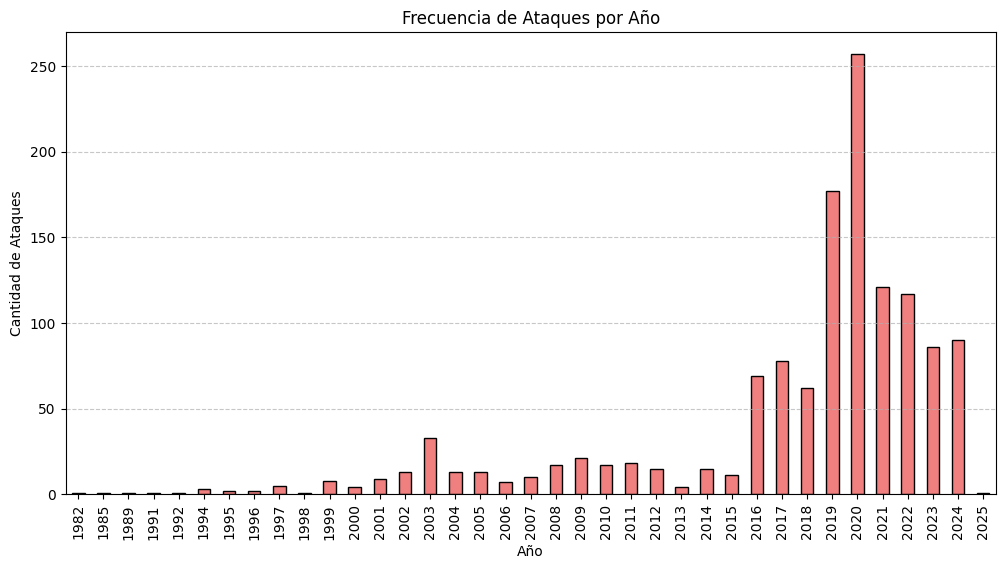

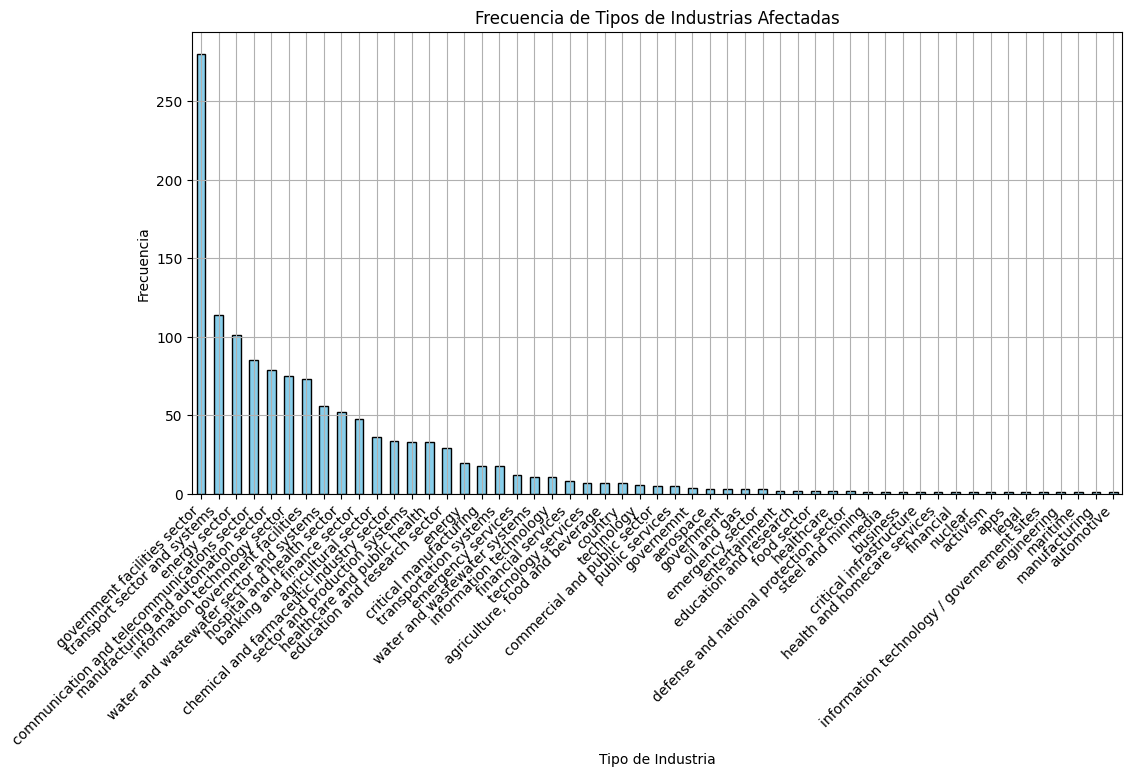

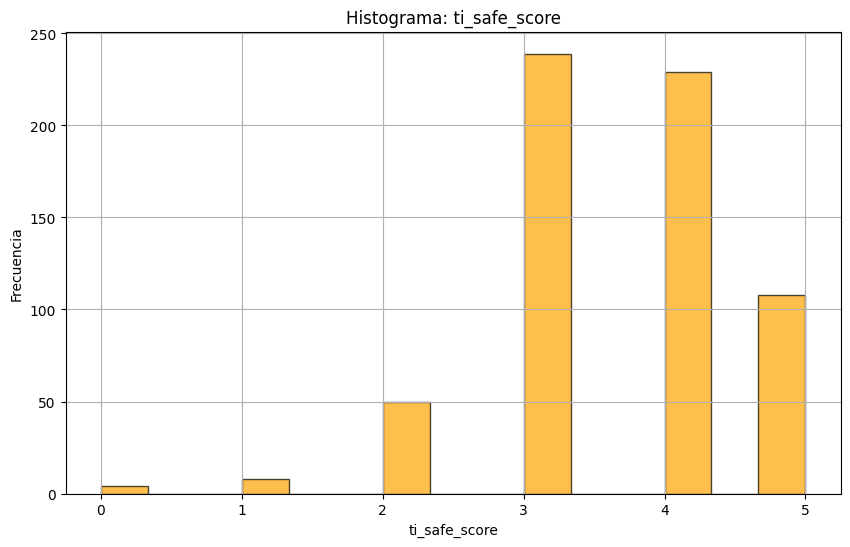

In [20]:
# Verificar si existe la columna 'date' y convertir a datetime si es necesario
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year  # Extraer el año

    # Contar la frecuencia de ataques por año
    attacks_per_year = df['year'].value_counts().sort_index()

    # Graficar la frecuencia de ataques por año
    plt.figure(figsize=(12, 6))
    attacks_per_year.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Frecuencia de Ataques por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Ataques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("La columna 'date' no está disponible en el dataset.")

# Gráfico de frecuencias para los tipos de industrias
if 'industry_type' in df.columns:
    industry_counts = df['industry_type'].value_counts()
    plt.figure(figsize=(12, 6))
    industry_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Frecuencia de Tipos de Industrias Afectadas')
    plt.xlabel('Tipo de Industria')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.show()
else:
    print("La columna 'industry_type' no está disponible en el dataset.")

# Histograma para la variable 'ti_safe_score'
if 'ti_safe_score' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['ti_safe_score'].dropna(), bins=15, color='orange', edgecolor='black', alpha=0.7)
    plt.title('Histograma: ti_safe_score')
    plt.xlabel('ti_safe_score')
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.show()
else:
    print("La columna 'ti_safe_score' no está disponible en el dataset.")


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_4092\3068562403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


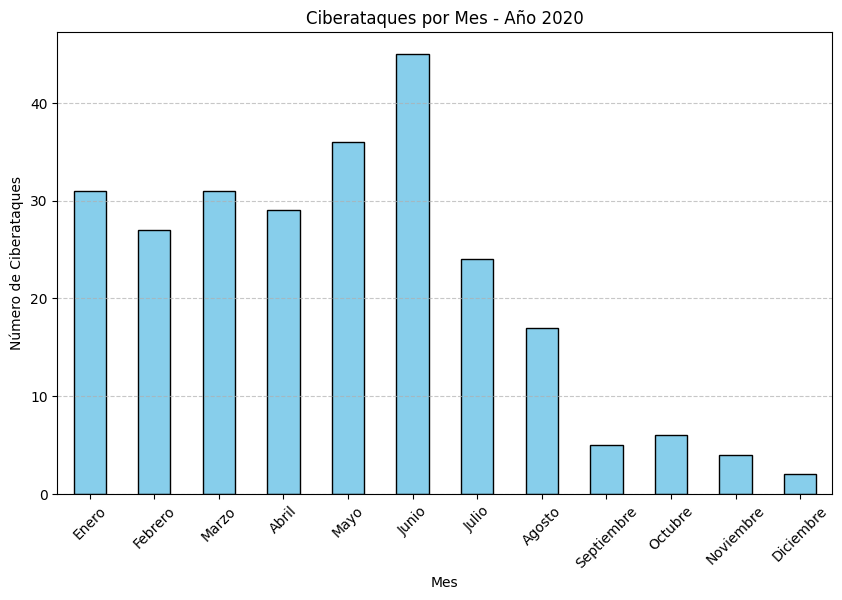

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_4092\3068562403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


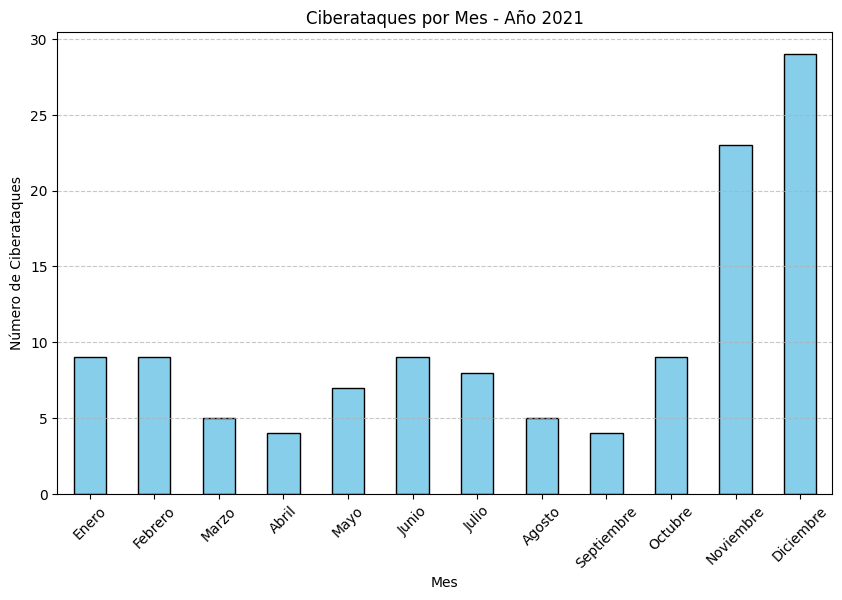

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_4092\3068562403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


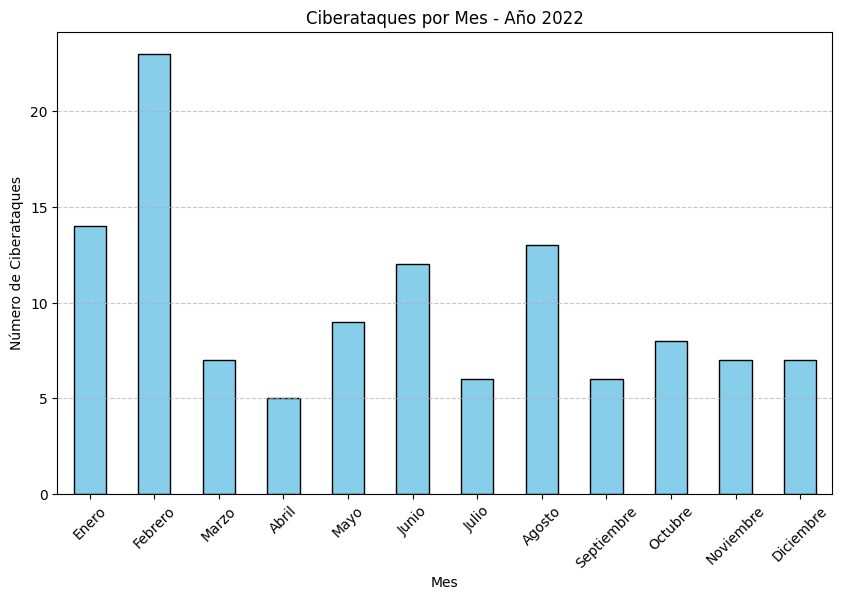

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_4092\3068562403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


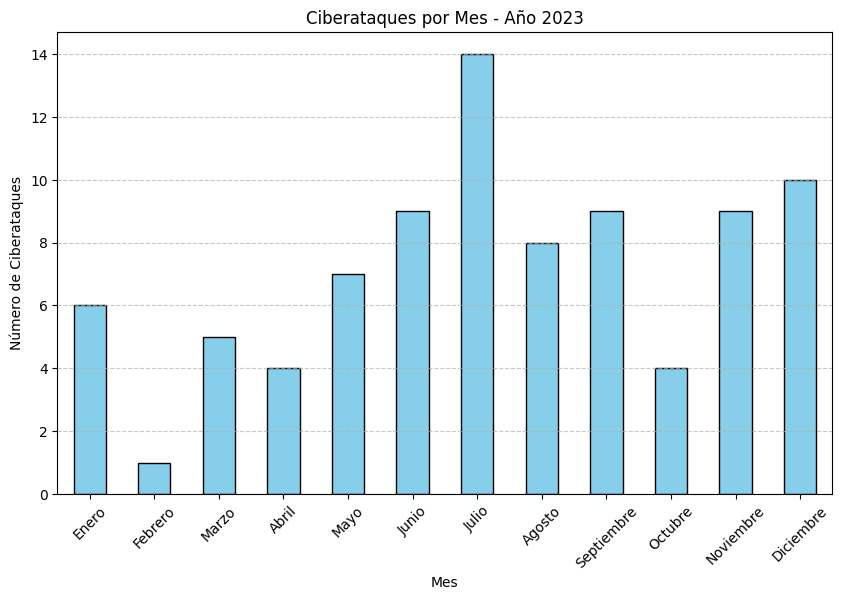

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_4092\3068562403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


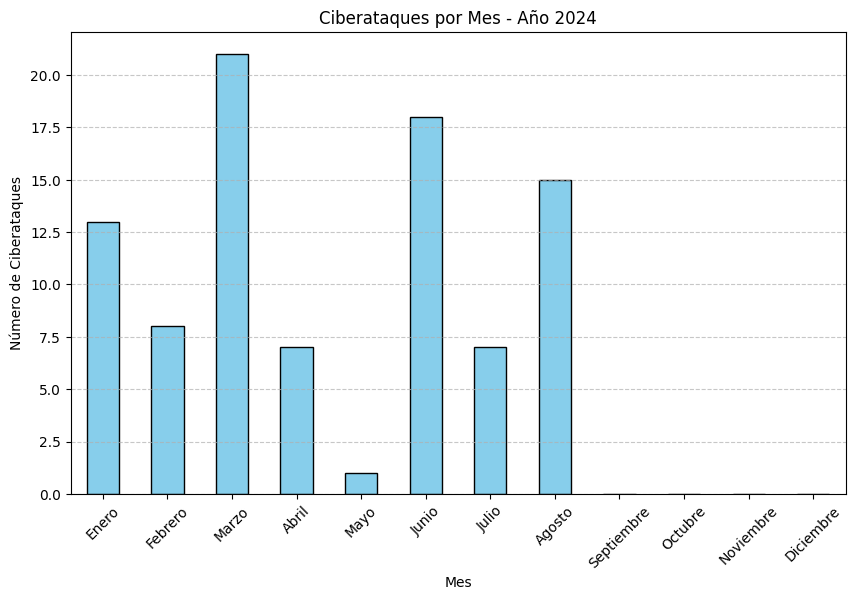

In [21]:
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'date' sea de tipo datetime
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrar los datos por año
years_to_plot = [2020, 2021, 2022, 2023, 2024]

# Iterar sobre los años y generar un gráfico por cada uno
for year in years_to_plot:
    # Filtrar los ciberataques para el año actual
    data_filtered = df[df['date'].dt.year == year]
    
    if not data_filtered.empty:  # Verificar si hay datos para el año actual
        # Contar los ciberataques por mes
        data_filtered['month'] = data_filtered['date'].dt.month
        monthly_counts = data_filtered['month'].value_counts().reindex(range(1, 13), fill_value=0)

        # Crear el gráfico
        plt.figure(figsize=(10, 6))
        monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Ciberataques por Mes - Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Número de Ciberataques')
        plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"No se encontraron ciberataques para el año {year}.")


### CLUSTERING K-MEANS

C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


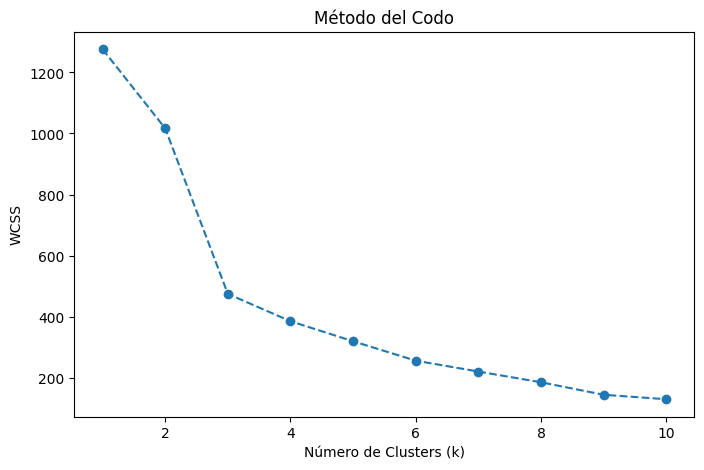

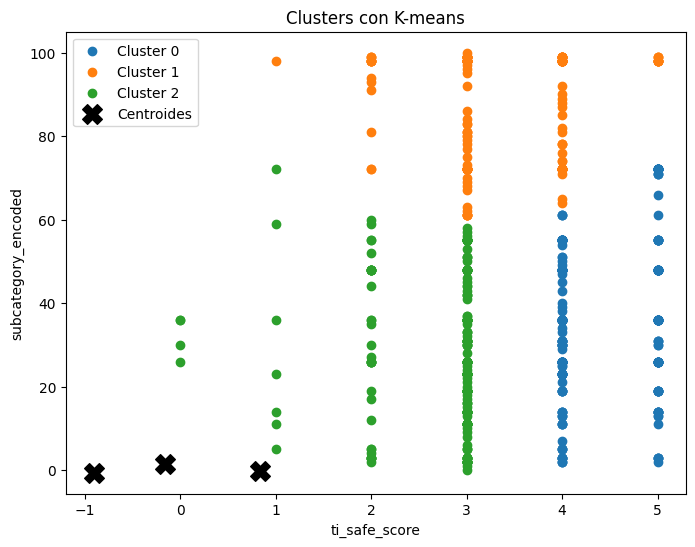

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Codificar las variables categóricas relevantes
label_encoder = LabelEncoder()
df['subcategory_encoded'] = label_encoder.fit_transform(df['subcategory'])
df['industry_type_encoded'] = label_encoder.fit_transform(df['industry_type'])

# Selección de variables numéricas para el clustering
numeric_features = ['ti_safe_score', 'subcategory_encoded']  # Ajusta según tus datos
data_numeric = df[numeric_features].dropna()  # Elimina filas con valores nulos

# Normalización de las variables numéricas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Método del codo para seleccionar el número óptimo de clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Visualizar el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Selección de k óptimo (por ejemplo, 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Agregar los clusters al dataframe original
df['cluster_kmeans'] = np.nan
df.loc[data_numeric.index, 'cluster_kmeans'] = clusters

# Visualización de los clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data_numeric[clusters == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.title('Clusters con K-means')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])
plt.legend()
plt.show()


### CLUSTERING JERARQUICO

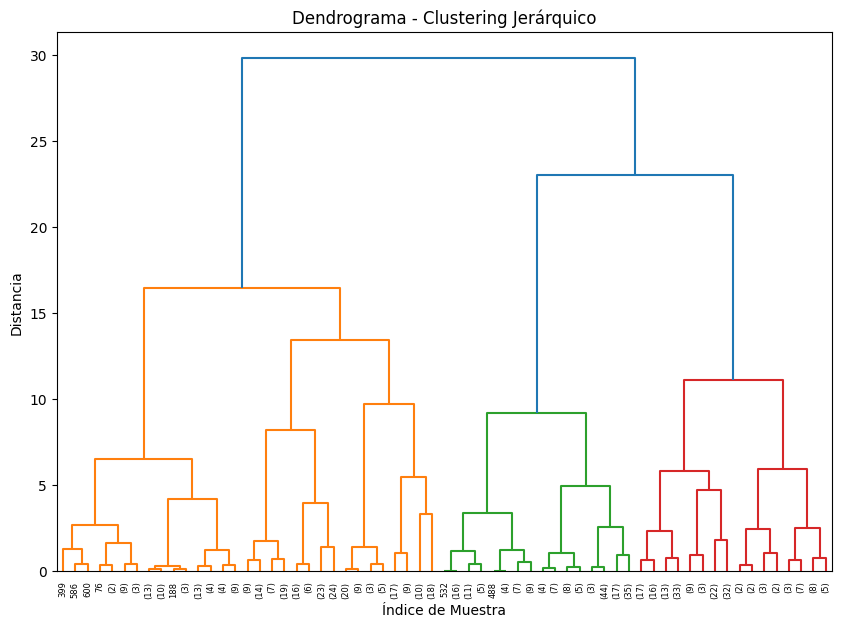

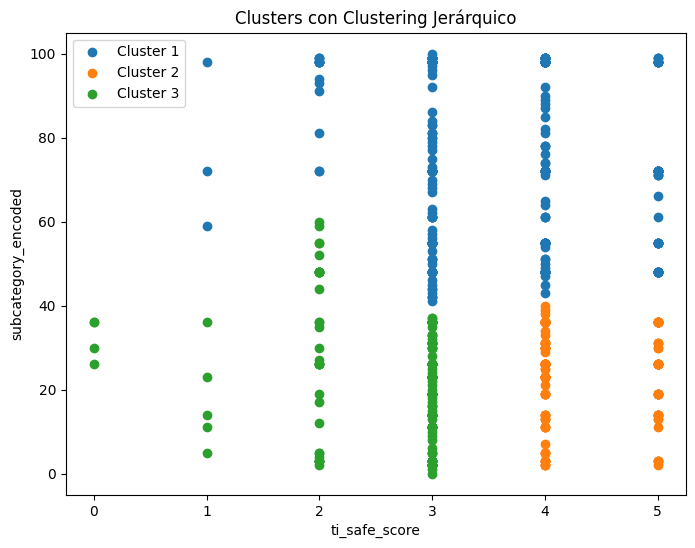

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Generar el linkage matrix para clustering jerárquico
linkage_matrix = linkage(data_scaled, method='ward')

# Crear dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Elegir un número de clusters basado en el dendrograma (por ejemplo, 3)
num_clusters = 3
hierarchical_clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Agregar los clusters al dataframe
df['cluster_hierarchical'] = np.nan
df.loc[data_numeric.index, 'cluster_hierarchical'] = hierarchical_clusters

# Visualización de los clusters jerárquicos
plt.figure(figsize=(8, 6))
for cluster in range(1, num_clusters + 1):
    cluster_data = data_numeric[hierarchical_clusters == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')
plt.title('Clusters con Clustering Jerárquico')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])
plt.legend()
plt.show()


### MODELOS PREDICTIVOS

In [31]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Inspeccionar los valores únicos en la columna 'impact'
print("Valores únicos en 'impact':", df['impact'].unique())

# Crear un diccionario de mapeo basado en los valores únicos de 'impact'
impact_mapping = {
    "High Impact": "Alto",
    "Medium Impact": "Medio",
    "Low Impact": "Bajo",
    # Ajusta las claves según tus datos
}

# Aplicar el mapeo
df['impact_grouped'] = df['impact'].map(impact_mapping)

# Verificar valores únicos en 'impact_grouped'
print("Valores únicos en 'impact_grouped':", df['impact_grouped'].unique())

# Eliminar filas con NaN en 'impact_grouped'
df = df.dropna(subset=['impact_grouped'])

# Codificar variables categóricas
df['country_encoded'] = LabelEncoder().fit_transform(df['country'])
df['industry_type_encoded'] = LabelEncoder().fit_transform(df['industry_type'])
df['impact_encoded'] = LabelEncoder().fit_transform(df['impact_grouped'])  # Variable objetivo

# Seleccionar columnas para el modelo
X = df[['country_encoded', 'industry_type_encoded', 'ti_safe_score']].dropna()
y = df.loc[X.index, 'impact_encoded']  # Alinear X e y

# Verificar que haya más de una clase en la variable objetivo
if len(y.unique()) <= 1:
    raise ValueError("La variable objetivo 'y' debe tener más de una clase para entrenar el modelo.")

# Balancear las clases con SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Comprobación de distribución después de SMOTE
print("Distribución de clases después de SMOTE:", pd.Series(y_balanced).value_counts())


Valores únicos en 'impact': []
Valores únicos en 'impact_grouped': []


ValueError: La variable objetivo 'y' debe tener más de una clase para entrenar el modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación de Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Evaluación de Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Importancia de las variables en Random Forest
plt.figure(figsize=(8, 5))
plt.bar(X.columns, rf_model.feature_importances_)
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Entrenar el modelo Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Evaluación de Árbol de Decisión
y_pred_dt = dt_model.predict(X_test)
print("Evaluación de Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))

# Visualización del Árbol de Decisión
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=LabelEncoder().fit(df['impact_grouped']).classes_, filled=True)
plt.title('Árbol de Decisión')
plt.show()

# Exportar reglas del Árbol de Decisión
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("\nReglas del Árbol de Decisión:")
print(tree_rules)
